In [1]:
# Write a program to create a Model using linear regression to predict the charges of insurance using the csv file provided named “insurance.csv”. Do the required process in the data before
#  making a model. Find predicted values, co-efficients, intercept and mean squared error.

In [2]:
#https://raw.githubusercontent.com/patelmanishv/Sem4Data/refs/heads/master/Data/insurance.csv

In [3]:
pip install pandas scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
df = pd.read_csv('https://raw.githubusercontent.com/patelmanishv/Sem4Data/refs/heads/master/Data/insurance.csv')

# Step 2: Preprocess the data
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Define features and target
X = df_encoded.drop('charges', axis=1)   # independent variables
y = df_encoded['charges']                # target variable

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

# Coefficients and intercept
print("📌 Coefficients:", model.coef_)
print("📌 Intercept:", model.intercept_)

# Predicted charges (first 10)
print("\n🔮 Predicted Charges (first 10):")
print(y_pred[:10])

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\n📉 Mean Squared Error:", mse)


📌 Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
📌 Intercept: -11931.21905032666

🔮 Predicted Charges (first 10):
[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656 10864.11316424   170.28084136 16903.45028662
  1092.43093614 11218.34318352]

📉 Mean Squared Error: 33596915.85136145


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://raw.githubusercontent.com/patelmanishv/Sem4Data/refs/heads/master/Data/insurance.csv')


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df = pd.get_dummies(df,drop_first=True)

In [9]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [10]:
#STEP 3

In [13]:
y = df['charges']
X = df.drop(columns=['charges'])
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([ 2548.35088388,   -99.66092009, 13351.68382905,  9688.46984762,
        7398.41604108,  1849.06998885,  9647.97966051,  7499.97677752,
        9051.32458143,  1127.01167811,  2278.93545995,  3792.11721068,
       10349.70286766, 31885.1869377 , 12478.20614342, 10804.83721259,
       11036.52126807,  4582.72648425,  5295.37955587,  5945.90288153,
        9573.85361785,  9581.00304705, 15624.78996199, 28734.95656719,
        5353.55019706, 12494.04902522, 13079.77206958,  4404.21608758,
        1167.74085026, 14819.02534824,  7995.45354734, 10573.7675232 ,
        7887.79240855, 28039.8741615 ,  3104.46783837,  9928.48740753,
       27840.63372309, 15653.69089989,  4255.18325   ,  2284.52896946,
        -264.30041873, 32922.66630744,  9265.7949399 ,  5292.34303986,
       30072.92123026,  6065.1125193 ,  7583.12489387, 16941.085307  ,
        6468.97554385, 11225.43854925, 18145.79032941, 25138.80668877,
       12909.40912631, 38922.83885763, 10714.75103213, 13815.90481075,
      

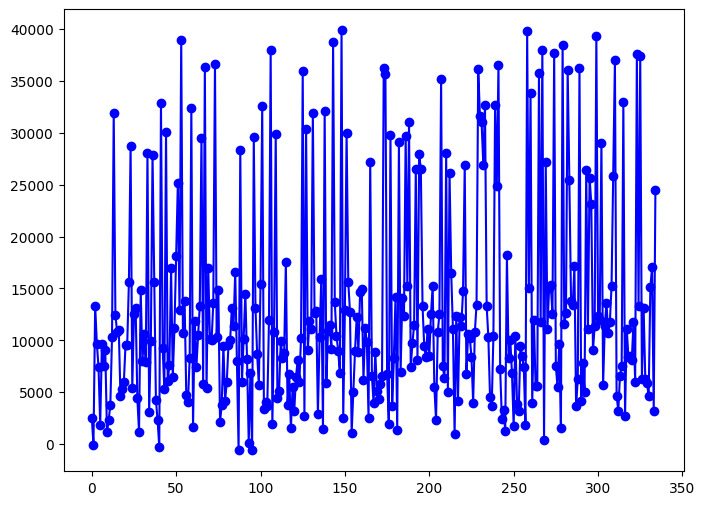

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(y_pred,marker='o',color='blue')
plt.show()

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://raw.githubusercontent.com/patelmanishv/Sem4Data/refs/heads/master/Data/insurance.csv')

df = pd.get_dummies(df,drop_first=True)

y = df['charges']
X = df.drop(columns=['charges'])

x_train,x_test,y_train,y_test = train_test_split(X,y)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(y_pred)

print('Coefficient of model is')
print(model.coef_)
print('Intercept of model is')
print(model.intercept_)

mse = mean_squared_error(y_test,y_pred)
mse

[28137.2870123  12137.57913235  9903.32986241  5062.90494803
 10453.35331303 31373.57436016  7278.151686   12258.52424805
 33824.72889463 35980.69588725 12718.21528038  5542.94920111
  9893.50705968  2872.03948031 10749.87635608 11818.49137703
  4887.74599694  8168.96972166 36682.35149311 13830.44327725
  3730.55258212 11352.04155923 13934.73892331  2228.27861685
  1747.5962507   8301.78892976  7650.89164845 14862.92633444
  1217.87317174 12182.3460866  15190.36174194 30039.29539353
 36146.46181396 14207.35077552 17227.42691191 12436.95625553
  3334.54910278  5821.96930823 32926.91657334 10373.69099747
 13012.25955947 36389.41611858  8078.92912794 11030.30039437
  9711.2182844  32223.50036016  3619.98366009  6565.07082557
  2449.29661488  4776.47277769 13451.50235464  6343.86284789
  7820.47931849  4404.68544454  4726.38323749 17943.14502734
  7025.86758155  6212.27714195  6268.24942082 29376.68617666
 10053.24678472 37033.64265462  8279.83982485  6271.19876744
 15935.58213609  9897.33

36188680.230800934